# Machine Learning and Data Analysis
----------------------------------------------
### *Session 3*


```
10th October, 2023
Anna Pallarès López
Computer Engineering Master's

```



### Generate data

In [60]:
# import libraries

import numpy as np
import numpy.matlib as nml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [61]:
# random generator (used to obtain the same random value)

np.random.seed(11)

In [62]:
# define a funtion

def oracle(x):
  # return x
  # return x**2
  # return np.abs(np.abs(x-.4)-.2)+x/2-.1 # piecewise
  return np.sinc(3*x) # exponential function

In [63]:
n = 100
sigma = .01
d = 1

In [64]:
x = np.random.rand(n)
y = oracle(x) + sigma*np.random.rand(n)

In [65]:
# X in R^{n x d}, y in R^{n}

X = np.asmatrix(x).transpose()
y = np.asmatrix(y).transpose()

### Ridge Regression

Ridge Regression (primal):

 f(xt) = w xt, w = (X' X + lambda I)^+ X' y, X \in R^{n x d}


Ridge Regression (dual):

f(xt) = alpha' X xt, alpha = (Q + lambda I)^+ y, Qij = x_i x_j, Q = X X', w = X' alpha

In [66]:
lam = 1

In [67]:
# Ridge Regression (primal)

w_primal = np.linalg.solve(
    np.matmul(np.transpose(X),X)+lam*np.eye(d),
    np.matmul(np.transpose(X),y)
)

In [68]:
alpha = np.linalg.solve(
    np.matmul(X,np.transpose(X))+lam*np.eye(n),
    y
)
w_dual = np.matmul(np.transpose(X),alpha)

In [69]:
ns = 1000
xs = np.linspace(0,1,ns)
Xs = np.asmatrix(xs).transpose()
ys = np.matmul(Xs,w_primal)
ys_primal = np.matmul(Xs,w_primal)
ys_dual = np.matmul(Xs,w_dual)

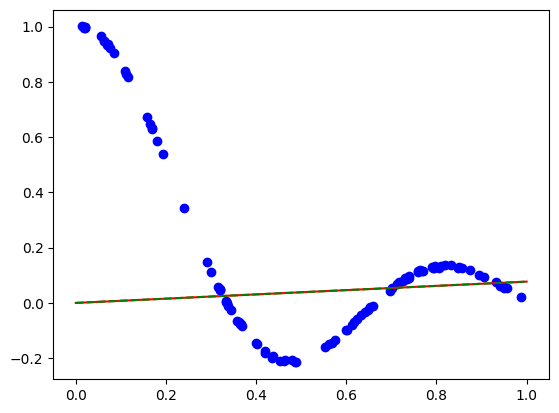

In [70]:
fig, ax = plt.subplots()
ax.plot(X,y,'bo')
ax.plot(Xs,ys_primal,'r')
ax.plot(Xs,ys_primal,'g--')

### Ridge Regression Dual
f(xt) = sum_{i = 1}^n alpha_i K(x_i,xt) = alpha * Kt,

lpha = (Q + lambda I)^+ y, Qij = K(x_i,x_j) = e^-gamma*||x_i-x_j ||^2

In [71]:
from sklearn.metrics import pairwise_distances

In [72]:
lam = .01 # as lower the lambda is, the flatest the model is
gam = 10 # if increases, the model become not linear
Q = np.exp(-gam*pairwise_distances(np.array(X))**2)
alpha = np.linalg.solve(Q+lam*np.eye(n),y)

In [76]:
ns = 1000
xs = np.linspace(0,1,ns)
Xs = np.asmatrix(xs).transpose()
Qs = np.exp(-gam*pairwise_distances(np.asarray(Xs),np.asarray(X))**2)
ys = np.matmul(Qs,alpha)

#ys = RR^(ns x 1)
#alpha = R^(n x 1)
#ys = Qs * alpha -> Qs = R^(ns*n)

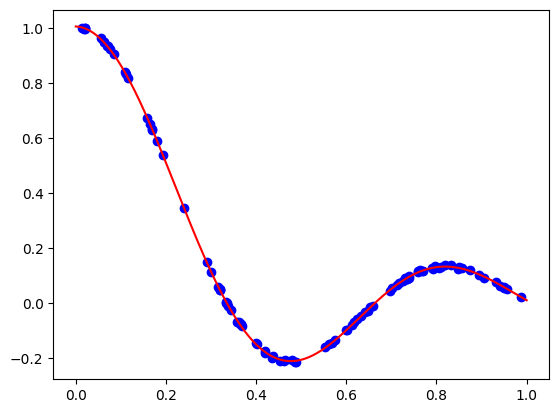

In [77]:
fig, ax = plt.subplots()
ax.plot(X,y,'bo')
ax.plot(Xs,ys,'r')